In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [3]:
# acc['latitude'][0]

In [4]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202130 entries, 0 to 202129
Data columns (total 41 columns):
Unnamed: 0         202130 non-null int64
OBJECTID           202130 non-null int64
INCKEY             202130 non-null int64
COLDETKEY          202130 non-null int64
REPORTNO           202130 non-null object
STATUS             202130 non-null object
ADDRTYPE           202130 non-null object
INTKEY             67263 non-null float64
LOCATION           202130 non-null object
EXCEPTRSNCODE      84141 non-null object
EXCEPTRSNDESC      7190 non-null object
SEVERITYCODE       202129 non-null object
SEVERITYDESC       202130 non-null object
COLLISIONTYPE      179243 non-null object
PERSONCOUNT        202130 non-null int64
PEDCOUNT           202130 non-null int64
PEDCYLCOUNT        202130 non-null int64
VEHCOUNT           202130 non-null int64
INJURIES           202130 non-null int64
SERIOUSINJURIES    202130 non-null int64
FATALITIES         202130 non-null int64
INCDATE            20

In [5]:
points=acc[['longitude','latitude']]

In [6]:
acc[['longitude','latitude']].describe()

,longitude,latitude
count,202130.000000,202130.000000
mean,-122.330756,47.620396
std,0.030076,0.055923
min,-122.419091,47.495573
25%,-122.349311,47.577939
50%,-122.330412,47.616269
75%,-122.311993,47.664304
max,-122.238951,47.734142


In [7]:
acc[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [8]:
acc[acc['longitude'].isnull()]

,Unnamed: 0,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude


In [10]:
acc[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [11]:
X = np.array(acc[['longitude','latitude']])

In [ ]:
sel_size=200
x=X[:sel_size]

In [ ]:
km = KMeans(50)
labels = km.fit_predict(X)

In [ ]:
l=labels[:sel_size]

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

In [ ]:
c = km.cluster_centers_

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(c[:,0],c[:,1])

In [ ]:
x=X[:2000]
maxk = 10
wcss = np.zeros(maxk)

for k in range(1, maxk):
    km = KMeans(k)
    y = km.fit_predict(x)
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
#             print('i1:',i1, ' i2:', i2)
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(3,maxk), wcss[3:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")

### K-means is not going to give good clusters in this case. 
We need density-based clustering. --> other notebook

Let's see in ay case what it looks like with 5 clusters

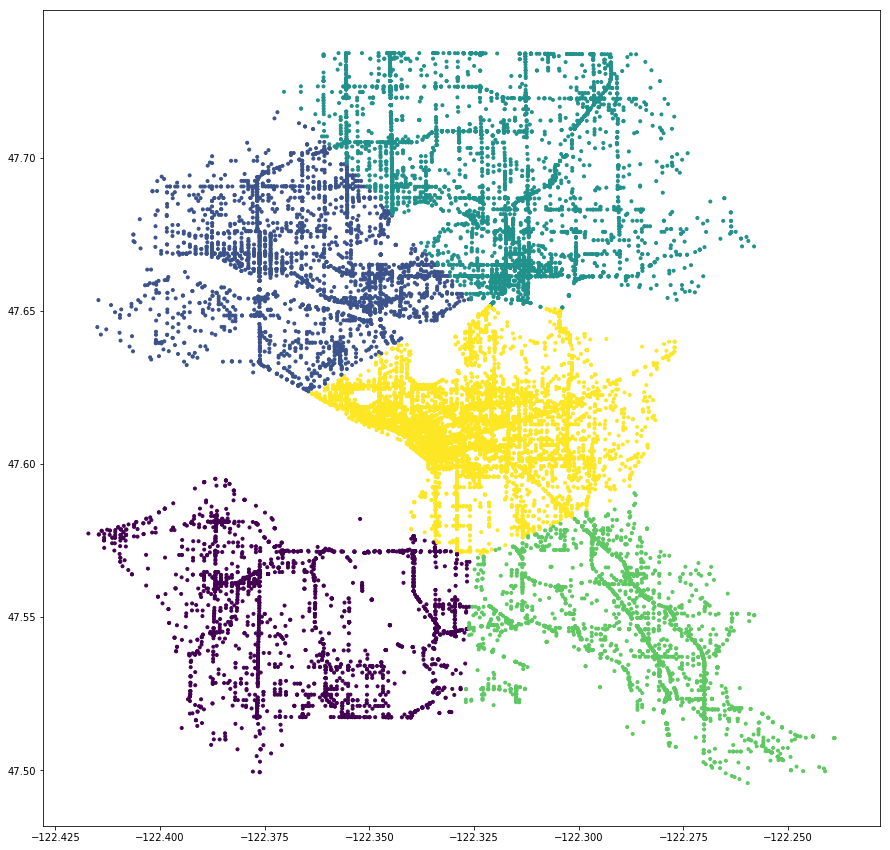

In [12]:
sel_size=20000
x=X[:sel_size]
km = KMeans(5)
labels = km.fit_predict(X)
l=labels[:sel_size]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

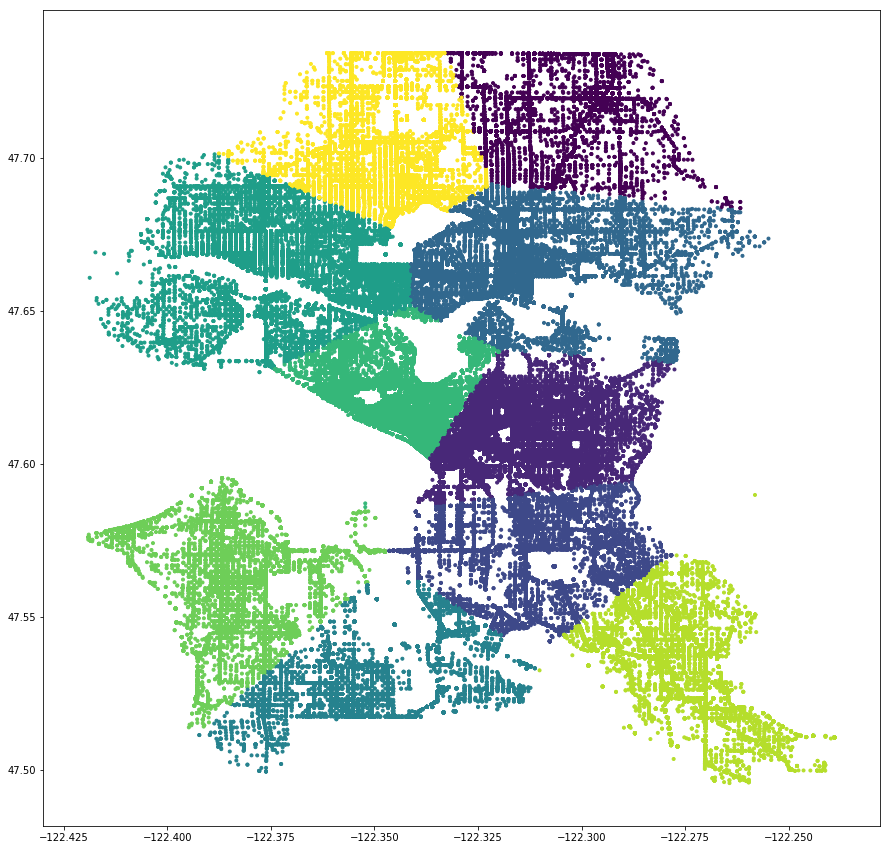

In [13]:
sel_size=200000
x=X[:sel_size]
km = KMeans(10)
labels = km.fit_predict(X)
l=labels[:sel_size]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

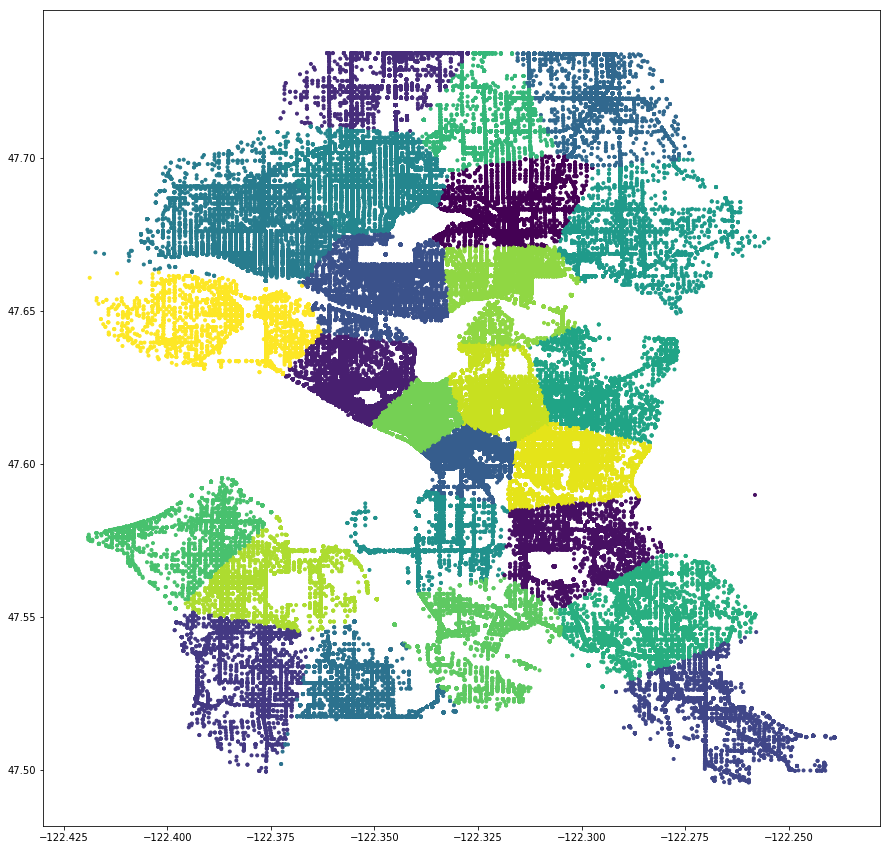

In [14]:
sel_size=200000
x=X[:sel_size]
km = KMeans(25)
labels = km.fit_predict(X)
l=labels[:sel_size]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')